In [156]:
!pip3 install geopandas


[notice] A new release of pip available: 22.3 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [157]:
import pandas as pd
import numpy as np
import geopandas as gpd
from matplotlib import pyplot as plt

In [158]:
!pip install folium


[notice] A new release of pip available: 22.3 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [159]:
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[34.15, -118.243683],
               zoom_start=11,
               tiles='cartodbpositron')

In [160]:
from pathlib import Path

DATA_DIR = Path("../data/")

def read_dataset_file(path: Path) -> np.lib.npyio.NpzFile:
    return np.load(file=path, allow_pickle=True)

metr_la = read_dataset_file(DATA_DIR / "metr_la_new.npz")
metr_la

NpzFile '../data/metr_la_new.npz' with keys: num_timestamps, num_nodes, first_timestamp_datetime, last_timestamp_datetime, timestamp_frequency...

In [161]:
metr_la["timestamp_frequency"].item()

datetime.timedelta(seconds=300)

In [162]:
EDGES_KEY = "edges"
TARGETS_KEY = "targets"
SPATIAL_FEATURES_KEY = "spatial_node_features"

In [163]:
metr_la[EDGES_KEY]

array([[  0,  37],
       [  0,  54],
       [  0, 116],
       ...,
       [206, 155],
       [206, 159],
       [206, 163]], dtype=int32)

In [164]:
metr_la_targets = metr_la[TARGETS_KEY]
metr_la_targets

array([[64.375   , 67.625   , 67.125   , ..., 59.25    , 69.      ,
        61.875   ],
       [62.666668, 68.55556 , 65.44444 , ..., 55.88889 , 68.44444 ,
        62.875   ],
       [64.      , 63.75    , 60.      , ..., 61.375   , 69.85714 ,
        62.      ],
       ...,
       [67.      , 59.666668, 69.55556 , ..., 63.333332, 67.44444 ,
        61.22222 ],
       [66.75    , 62.25    , 66.      , ..., 63.      , 67.875   ,
        63.5     ],
       [65.111115, 66.888885, 66.77778 , ..., 63.555557, 68.666664,
        61.77778 ]], dtype=float32)

In [165]:
timestamps = pd.date_range(start=metr_la["first_timestamp_datetime"].item(),
                           end=metr_la["last_timestamp_datetime"].item(),
                           freq="5min",
                           )
timestamps

DatetimeIndex(['2012-03-01 00:00:00', '2012-03-01 00:05:00',
               '2012-03-01 00:10:00', '2012-03-01 00:15:00',
               '2012-03-01 00:20:00', '2012-03-01 00:25:00',
               '2012-03-01 00:30:00', '2012-03-01 00:35:00',
               '2012-03-01 00:40:00', '2012-03-01 00:45:00',
               ...
               '2012-06-27 23:10:00', '2012-06-27 23:15:00',
               '2012-06-27 23:20:00', '2012-06-27 23:25:00',
               '2012-06-27 23:30:00', '2012-06-27 23:35:00',
               '2012-06-27 23:40:00', '2012-06-27 23:45:00',
               '2012-06-27 23:50:00', '2012-06-27 23:55:00'],
              dtype='datetime64[ns]', length=34272, freq='5T')

In [166]:
# heat_data = [[r['pickup_latitude'], r['pickup_longitude']] for _, r in df.iterrows()]
time = 0
metr_la_coords = metr_la[SPATIAL_FEATURES_KEY]

metr_la_coords.shape

(1, 207, 2)

In [167]:
df = pd.DataFrame(metr_la_coords[0], columns=['latitude', 'longitude'])

# HeatMap(df, radius=10).add_to(m)

In [168]:
m

In [169]:
!pip install osmnx


[notice] A new release of pip available: 22.3 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [170]:
!pip install shapely


[notice] A new release of pip available: 22.3 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [171]:
import shapely
from shapely.geometry import Point, Polygon, LineString
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon, GeometryCollection, LineString
import json

In [172]:
multipoints = MultiPoint([[a, b] for a, b in metr_la_coords[0]])

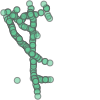

In [173]:
multipoints

In [174]:
geojson = shapely.geometry.mapping(multipoints)
geojson

{'type': 'MultiPoint',
 'coordinates': ((34.15496826171875, -118.31829071044922),
  (34.1162109375, -118.23799133300781),
  (34.11640930175781, -118.23818969726562),
  (34.072479248046875, -118.2677230834961),
  (34.07141876220703, -118.26571655273438),
  (34.069129943847656, -118.25932312011719),
  (34.053680419921875, -118.23368835449219),
  (34.13486099243164, -118.22931671142578),
  (34.202640533447266, -118.47351837158203),
  (34.15562057495117, -118.46859741210938),
  (34.16415023803711, -118.38223266601562),
  (34.15690994262695, -118.22469329833984),
  (34.078208923339844, -118.28794860839844),
  (34.15660095214844, -118.30265808105469),
  (34.189491271972656, -118.47437286376953),
  (34.07006072998047, -118.26245880126953),
  (34.07313919067383, -118.23387908935547),
  (34.07732009887695, -118.2818603515625),
  (34.20671844482422, -118.19992065429688),
  (34.120948791503906, -118.339111328125),
  (34.120731353759766, -118.33927917480469),
  (34.205841064453125, -118.1980285644

In [175]:
colors = ['green', 'yellow', 'red']

In [176]:
!pip install imageio
!pip install selenium
!pip install pillow
!pip install html2image


[notice] A new release of pip available: 22.3 -> 25.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3 -> 25.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3 -> 25.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [177]:
import os
from html2image import Html2Image

hti = Html2Image()

def get_timestamp_map(timestamp):
    m = folium.Map(location=[34.15, -118.243683],
                    zoom_start=11, 
                    tiles='cartodbpositron')
    for i, point in enumerate(geojson['coordinates']):
        normal_vel = (metr_la_targets[timestamp, i]) / 75
        sensor_color = colors[0]
        if normal_vel < 0.5 and normal_vel > 0.3:
            sensor_color = colors[1]
        elif normal_vel <= 0.3:
            sensor_color = colors[2]
        folium.CircleMarker(list(point), radius=5, fill=True, color=sensor_color, 
                            fill_color=sensor_color, fill_opacity=0.6).add_to(m)
        
    return m
    
    #m.save(f'map_{i}.html')
    #hti.screenshot(url=f'map_{i}.html', save_as=f'./temp_frames/frame_{i}.png')

get_timestamp_map(0)

In [180]:
start = 0
count = 288

In [189]:
from tqdm import tqdm

os.makedirs('temp_frames', exist_ok= True)

for i in tqdm(range(start, start + count)):
    timestep_map = get_timestamp_map(i)
    timestep_map.save(f'temp_frames/map_{i}.html')
    
"""# Собираем GIF
frames = [Image.open(f'./temp_frames/frame_{i}.png') for i in range(count)]
frames[0].save('map_animation.gif', format='GIF', append_images=frames[1:],
               save_all=True, duration=100, loop=0)
hti.screenshot(url=f'map_{i}.html', save_as=f'/Users/macbook/Documents/projects/graphs/spatiotemporal_analysis/notebooks/temp_frames/frame_{i}.png')

# Чистим временные файлы
for i in range(count):
    os.remove(f'temp_frames/frame_{i}.png')
    os.remove(f'temp_frames/map_{i}.html')
os.rmdir('temp_frames')"""

100%|██████████| 288/288 [00:10<00:00, 28.29it/s]


"# Собираем GIF\nframes = [Image.open(f'./temp_frames/frame_{i}.png') for i in range(count)]\nframes[0].save('map_animation.gif', format='GIF', append_images=frames[1:],\n               save_all=True, duration=100, loop=0)\nhti.screenshot(url=f'map_{i}.html', save_as=f'/Users/macbook/Documents/projects/graphs/spatiotemporal_analysis/notebooks/temp_frames/frame_{i}.png')\n\n# Чистим временные файлы\nfor i in range(count):\n    os.remove(f'temp_frames/frame_{i}.png')\n    os.remove(f'temp_frames/map_{i}.html')\nos.rmdir('temp_frames')"

In [190]:
from shutil import copyfile

def html_to_image(html_file, output):
    path = Path("temp_frames/" + output)
    if path.exists():
        return
    
    hti = Html2Image()

    hti = Html2Image(
        custom_flags=["--headless", "--disable-gpu", "--no-sandbox"]
    )
    
    hti.screenshot(url=html_file, save_as=output)
    copyfile(output, "temp_frames/" + output)
    os.remove(output)
    

In [183]:
!pip install tqdm


[notice] A new release of pip available: 22.3 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [191]:
for i in tqdm(range(count)):
    i += start 
    html_to_image(f'temp_frames/map_{i}.html', f'frame_{i}.png')

 12%|█▎        | 36/288 [03:04<19:13,  4.58s/it]2332515 bytes written to file /Users/macbook/Documents/projects/graphs/spatiotemporal_analysis/notebooks/frame_36.png
[3538:259:0206/231240.547137:ERROR:externally_managed_app_manager.cc(611)] https://www.youtube.com/s/notifications/manifest/cr_install.html from install source 1 failed to install with reason 21
 16%|█▌        | 45/288 [03:36<15:05,  3.73s/it]2345375 bytes written to file /Users/macbook/Documents/projects/graphs/spatiotemporal_analysis/notebooks/frame_45.png
[3882:259:0206/231313.146254:ERROR:externally_managed_app_manager.cc(611)] https://www.youtube.com/s/notifications/manifest/cr_install.html from install source 1 failed to install with reason 21
 17%|█▋        | 50/288 [03:55<14:41,  3.70s/it]2311754 bytes written to file /Users/macbook/Documents/projects/graphs/spatiotemporal_analysis/notebooks/frame_50.png
[4071:259:0206/231331.727977:ERROR:externally_managed_app_manager.cc(611)] https://www.youtube.com/s/notificatio

In [185]:
from PIL import Image

frames = [Image.open(f'temp_frames/frame_{i + start}.png') for i in tqdm(range(int(count)))]
with tqdm(total=len(frames), desc="Создание анимации") as pbar:
    frames[0].save(
        'map_animation.gif',
        format='GIF',
        append_images=frames[1:],
        save_all=True,
        duration=120,
        loop=0,
        optimize=True,
        callback=lambda _: pbar.update(0)
    )


Создание анимации:   0%|          | 0/288 [02:27<?, ?it/s]


OSError: [Errno 66] Directory not empty: 'temp_frames'

In [ ]:
for i in tqdm(range(start, start + count)):
    os.remove(f'temp_frames/frame_{i}.png')
    os.remove(f'temp_frames/map_{i}.html')
os.rmdir('temp_frames')

In [ ]:
metr_la_edges = metr_la[EDGES_KEY]
metr_la_edges

In [ ]:
multiline = MultiLineString([LineString([Point(metr_la_coords[0][start]), Point(metr_la_coords[0][end])])
                            for start, end in metr_la_edges])
multiline

In [ ]:
geojson_line = shapely.geometry.mapping(multiline)
geojson_line

In [ ]:
for line, line2 in geojson_line['coordinates']:
    print(line)
    print(line2)
    print("//")

In [109]:
for line in geojson_line['coordinates']:
    folium.PolyLine([list(line[0]), list(line[1])], color='blue', weight=1, opacity=0.25).add_to(m)

In [ ]:
m